<a href="https://colab.research.google.com/github/Centrattic/SEESZooniverse/blob/main/training/outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [ ]:
base_path = "drive/MyDrive/Colab Notebooks/outputs/probabilities/"

In [ ]:
def get_metrics(save_name, ftr_name, threshold):
  csv = pd.read_csv(base_path + save_name + "/" + "model.csv")

  csv['img_loc'][0]
  arr = [-1] * len(csv)
  for i in range(len(csv)):
    if f"no_{ftr_name}" in csv['img_loc'][i]:
      arr[i] = 0
    elif ftr_name in csv['img_loc'][i]:
      arr[i] = 1

  csv[ftr_name] = arr

  rounded_probs = [int(np.round(prob + 0.5 - threshold)) for prob in csv['probability']]
  acc = skm.accuracy_score(csv[ftr_name], rounded_probs)
  auprc = np.round(skm.average_precision_score(csv[ftr_name], csv['probability']), 2)
  auroc = np.round(skm.roc_auc_score(csv[ftr_name], csv['probability']),2)

  print(np.round([acc, auprc, auroc], 3))

  cm = skm.confusion_matrix(csv[ftr_name], rounded_probs, labels=[0, 1])

  disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no " + ftr_name, ftr_name])
  fig, ax = plt.subplots(figsize=(4,4))
  ax.set_yticklabels(["no " + ftr_name, ftr_name], fontsize = 'small', rotation=90, va = 'center')
  ax.set_xticklabels([ftr_name, "no " + ftr_name], fontsize = 'small', rotation=90, ha = 'center')
  ax.set_title("Confusion Matrix")
  disp.plot(ax=ax)

  fpr, tpr, _ = skm.roc_curve(csv[ftr_name], csv['probability'])
  figroc, axroc = plt.subplots(figsize=(5,3))
  axroc.set_title("ROC Curve")
  plt.xlabel("1-Specificity")
  plt.ylabel("Sensitivity")
  plt.plot(fpr,tpr,label="AUC = "+str(auroc))
  plt.legend(loc = 'lower right')
  plt.show()

  pr, re, _ = skm.precision_recall_curve(csv[ftr_name], csv['probability'])
  figprc, axprc = plt.subplots(figsize=(5,3))
  axprc.set_title("PR Curve")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.ylim(bottom = 0, top =1.05)
  plt.plot(re, pr,label="AUC = "+str(auprc))
  plt.legend(loc= 'lower right')
  plt.show()

In [ ]:
plt.rcParams

[0.127 0.04  0.06 ]


<ipython-input-189-869ca821fef3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["no " + ftr_name, ftr_name], fontsize = 'small', rotation=90, va = 'center')
<ipython-input-189-869ca821fef3>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ftr_name, "no " + ftr_name], fontsize = 'small', rotation=90, ha = 'center')


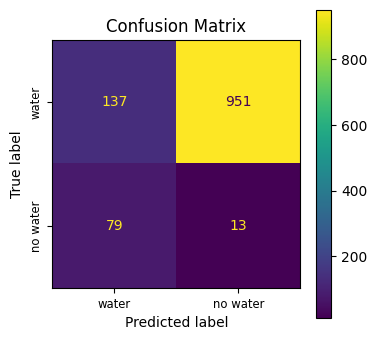

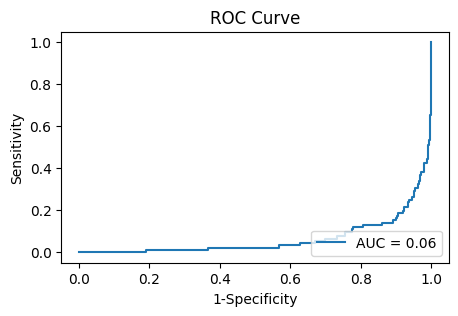

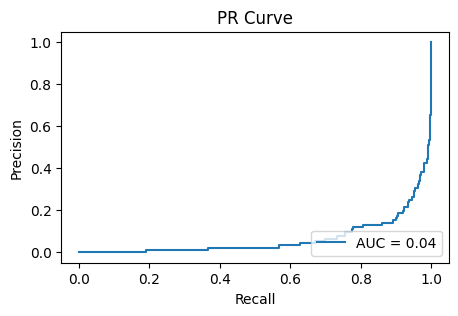

In [ ]:
get_metrics("water", "water", 0.55)

[0.875 0.98  0.94 ]


<ipython-input-167-a82cca1d138b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["no " + ftr_name, ftr_name], fontsize = 'small', rotation=90, va = 'center')
<ipython-input-167-a82cca1d138b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ftr_name, "no " + ftr_name], fontsize = 'small', rotation=90, ha = 'center')


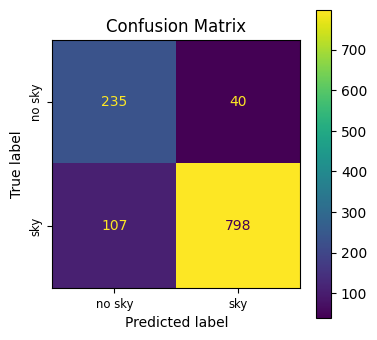

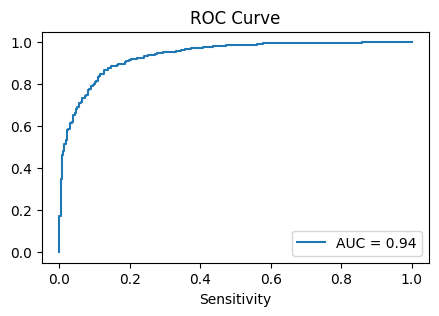

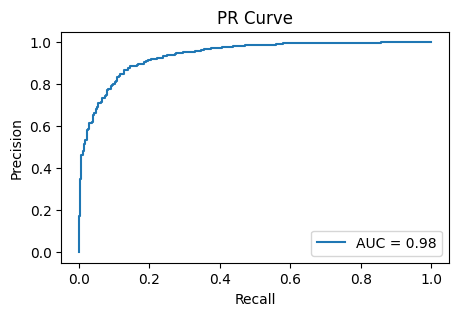

In [ ]:
get_metrics("sky", "sky", 0.5)

In [ ]:
837/(837+68)

0.9248618784530387

In [ ]:
land_csv = get_metrics("land", 0.45) # 1 - must somehow be screwed up here

TypeError: ignored

[0.857 0.99  0.67 ]


<ipython-input-208-2021abd478ea>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["no " + ftr_name, ftr_name], fontsize = 'small', rotation=90, va = 'center')
<ipython-input-208-2021abd478ea>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ftr_name, "no " + ftr_name], fontsize = 'small', rotation=90, ha = 'center')


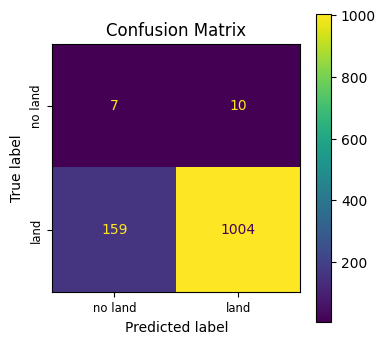

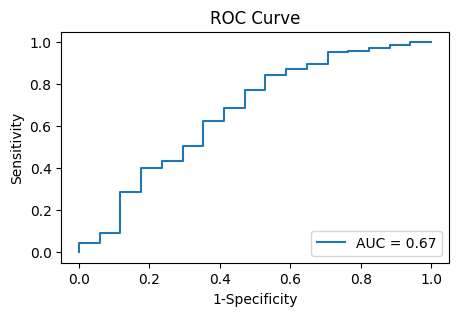

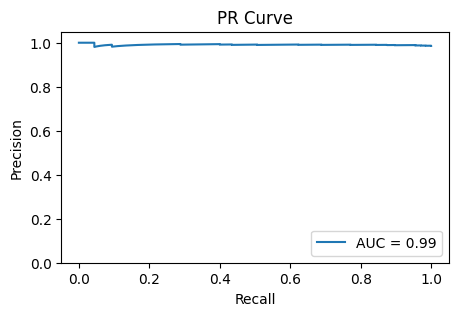

In [ ]:
get_metrics("land_weighting_larger", "land", 0.55) # ohh it is just regular here - since l comes before n lmaoooo